In [49]:
import pandas as pd
import phik
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [4]:
try:
    clinical = pd.read_table('data/clinical.tsv')
    exposure = pd.read_table('data/exposure.tsv')
    family_history = pd.read_table('data/family_history.tsv')
    follow_up = pd.read_table('data/follow_up.tsv')
    pathology_detail = pd.read_table('data/pathology_detail.tsv')
except:
    print('error_load_data')

In [5]:
clinical.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [6]:
exposure.head()

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [7]:
family_history.head()

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_with_cancer_history,relatives_with_cancer_history_count


In [8]:
follow_up.head()

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,...,second_gene_symbol,specialized_molecular_test,test_analyte_type,test_result,test_units,test_value,transcript,variant_origin,variant_type,zygosity


In [9]:
pathology_detail.head()

,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,...,rhabdoid_percent,rhabdoid_present,sarcomatoid_percent,sarcomatoid_present,size_extraocular_nodule,transglottic_extension,tumor_largest_dimension_diameter,tumor_thickness,vascular_invasion_present,vascular_invasion_type


In [10]:
clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Columns: 158 entries, case_id to treatment_type
dtypes: object(158)
memory usage: 131.0+ KB


In [11]:
exposure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   case_id                                 48 non-null     object
 1   case_submitter_id                       48 non-null     object
 2   project_id                              48 non-null     object
 3   age_at_onset                            48 non-null     object
 4   alcohol_days_per_week                   48 non-null     object
 5   alcohol_drinks_per_day                  48 non-null     object
 6   alcohol_history                         48 non-null     object
 7   alcohol_intensity                       48 non-null     object
 8   alcohol_type                            48 non-null     object
 9   asbestos_exposure                       48 non-null     object
 10  bmi                                     48 non-null     object
 11  cigarett

In [12]:
clinical.describe().T

,count,unique,top,freq
case_id,106,58,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,2
case_submitter_id,106,58,TCGA-FA-A7Q1,2
project_id,106,1,TCGA-DLBC,106
age_at_index,106,35,'--,10
age_is_obfuscated,106,1,'--,106
...,...,...,...,...
treatment_frequency,106,1,'--,106
treatment_intent_type,106,1,'--,106
treatment_or_therapy,106,4,yes,51
treatment_outcome,106,1,'--,106


In [13]:
exposure.describe().T

,count,unique,top,freq
case_id,48,48,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,1
case_submitter_id,48,48,TCGA-FA-A7Q1,1
project_id,48,1,TCGA-DLBC,48
age_at_onset,48,1,'--,48
alcohol_days_per_week,48,1,'--,48
alcohol_drinks_per_day,48,1,'--,48
alcohol_history,48,1,Not Reported,48
alcohol_intensity,48,1,'--,48
alcohol_type,48,1,'--,48
asbestos_exposure,48,1,'--,48


In [14]:
clinical.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [15]:
len(clinical['case_id'].unique())

58

In [16]:
len(clinical['case_submitter_id'].unique())

58

In [17]:
clinical.count()

case_id                  106
case_submitter_id        106
project_id               106
age_at_index             106
age_is_obfuscated        106
                        ... 
treatment_frequency      106
treatment_intent_type    106
treatment_or_therapy     106
treatment_outcome        106
treatment_type           106
Length: 158, dtype: int64

In [18]:
len(exposure['case_id'].unique()) == exposure['case_id'].count()

np.True_

exposure 48 уникальных значений (параметры исследуемого (анамнестические, антропометрические данные...))
clinical 58 уникальных значений (клинический случай)
первичный ключ case_id

In [19]:
clinical.columns

Index(['case_id', 'case_submitter_id', 'project_id', 'age_at_index',
       'age_is_obfuscated', 'cause_of_death', 'cause_of_death_source',
       'country_of_residence_at_enrollment', 'days_to_birth', 'days_to_death',
       ...
       'treatment_arm', 'treatment_dose', 'treatment_dose_units',
       'treatment_effect', 'treatment_effect_indicator', 'treatment_frequency',
       'treatment_intent_type', 'treatment_or_therapy', 'treatment_outcome',
       'treatment_type'],
      dtype='object', length=158)

In [20]:
clinical['case_id'].unique()=="'--"

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [21]:
sum(clinical['case_id'].unique()=="'--")

np.int64(0)

In [22]:
result = []

In [23]:
count_column = 0
for colun in clinical.columns:
    if sum(clinical[colun].unique()=="'--")==1 and len(clinical[colun].unique())==1:
        pass
    else:
        result.append(colun)

In [24]:
result

['case_id',
 'case_submitter_id',
 'project_id',
 'age_at_index',
 'days_to_birth',
 'days_to_death',
 'ethnicity',
 'gender',
 'race',
 'vital_status',
 'year_of_birth',
 'year_of_death',
 'age_at_diagnosis',
 'ann_arbor_b_symptoms',
 'ann_arbor_clinical_stage',
 'ann_arbor_extranodal_involvement',
 'classification_of_tumor',
 'days_to_diagnosis',
 'days_to_last_follow_up',
 'icd_10_code',
 'last_known_disease_status',
 'morphology',
 'primary_diagnosis',
 'prior_malignancy',
 'prior_treatment',
 'progression_or_recurrence',
 'site_of_resection_or_biopsy',
 'synchronous_malignancy',
 'tissue_or_organ_of_origin',
 'tumor_grade',
 'year_of_diagnosis',
 'treatment_or_therapy',
 'treatment_type']

In [30]:
len(result)

33

In [39]:
data = clinical[result]

In [108]:
data[data['treatment_or_therapy']!="'--"]['treatment_or_therapy'].value_counts(normalize=True)*100

treatment_or_therapy
yes             53.125000
no              44.791667
not reported     2.083333
Name: proportion, dtype: float64

In [68]:
year_of_birth = data[data['year_of_birth']!="'--"]['year_of_birth']

In [78]:
age_at_diagnosis = data[data['age_at_diagnosis']!="'--"]['age_at_diagnosis']

In [90]:
target_graf = data[data['vital_status']!="'--"]['vital_status'].value_counts(normalize=True)
target_graf

vital_status
Alive    0.8125
Dead     0.1875
Name: proportion, dtype: float64

/tmp/ipykernel_54319/3522173680.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_graf.plot(kind='bar', label=f'{target_graf[0]}, {target_graf[1]}')


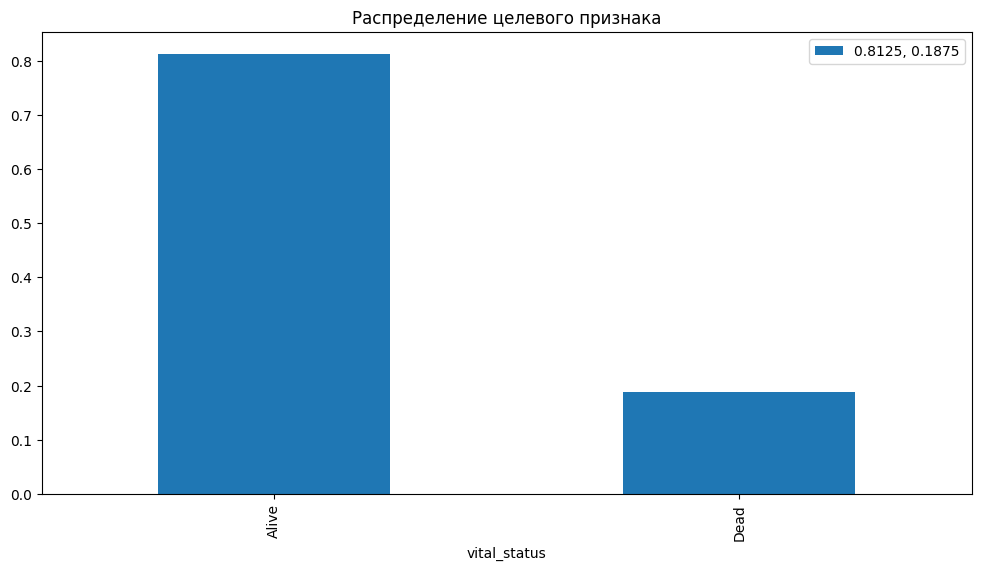

In [100]:
plt.figure(figsize=(12, 6))
target_graf.plot(kind='bar', label=f'{target_graf[0]}, {target_graf[1]}')
plt.title('Распределение целевого признака')
plt.legend(loc="upper right")
plt.show();

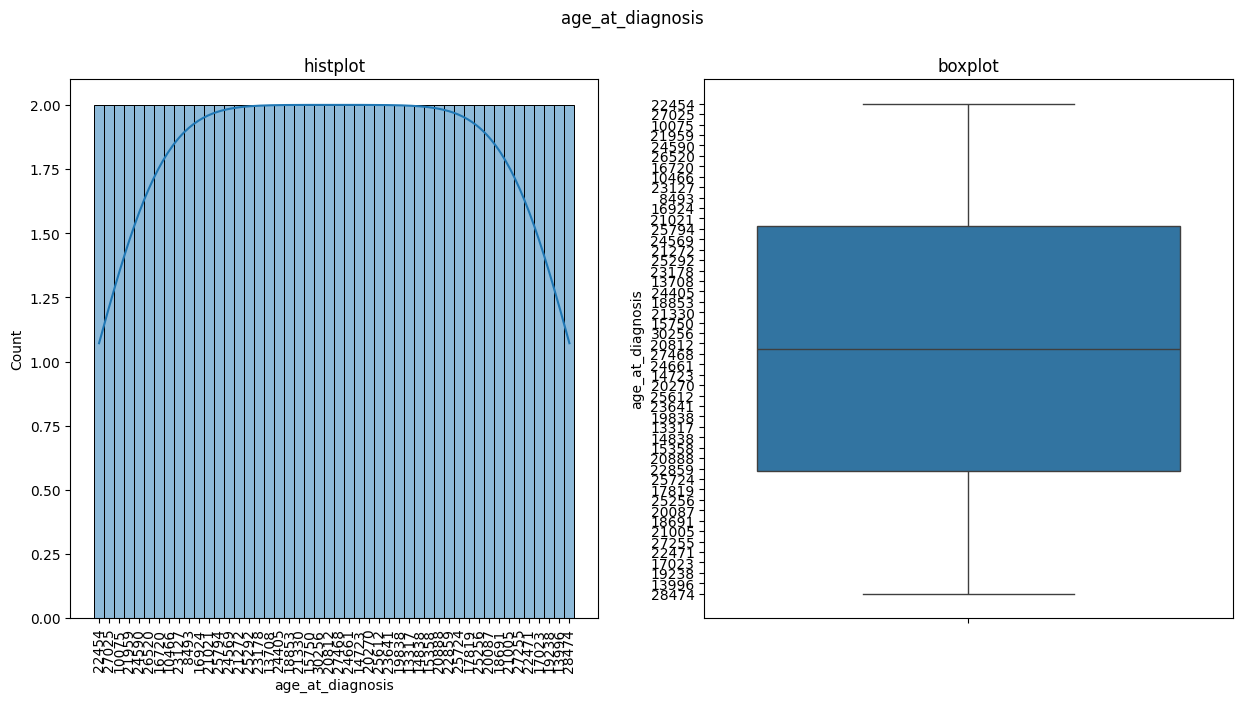

In [81]:
fig, axes = plt.subplots(1,2,figsize=(15,7), sharey='col')  
sns.histplot(data=age_at_diagnosis,ax=axes[0],kde=True, )
sns.boxplot(data=age_at_diagnosis,ax=axes[1])
axes[0].set_title('histplot')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('boxplot')
fig.suptitle('age_at_diagnosis')
plt.show();

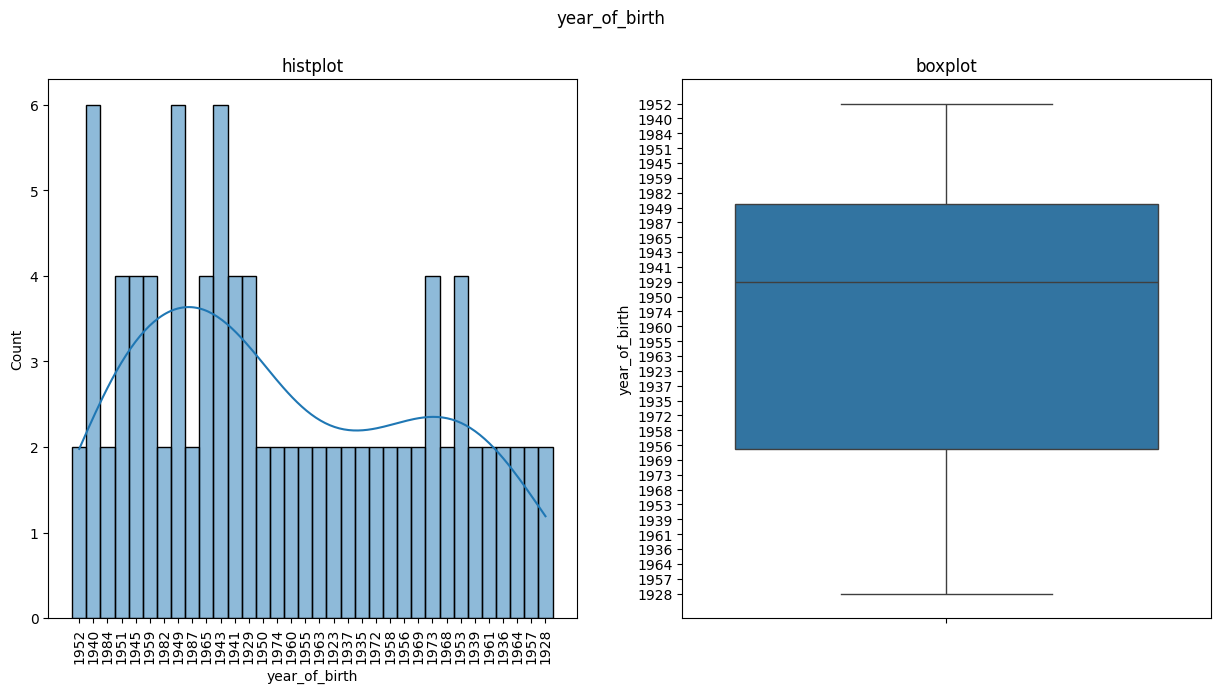

In [80]:
fig, axes = plt.subplots(1,2,figsize=(15,7), sharey='col')  
sns.histplot(data=year_of_birth,ax=axes[0],kde=True, )
sns.boxplot(data=year_of_birth,ax=axes[1])
axes[0].set_title('histplot')
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('boxplot')
fig.suptitle('year_of_birth')
plt.show();

# таблицы clinical, exposure возможно их объединение по первичному ключю с последующей группировкой case_submitter_id, project_id
# присутствуют большое колво пропусков "'--"
# возможно использовать целевую переменную:
* days_to_death прогнозирвоание летальности (продолжительности жизни)
* vital_status прогнозирвоание летальности (его верояности)